In [15]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Compute probabilities

In [5]:
# X ~ N(0.05, (0.10)^2)
mu_x = 0.05
sigma_x = 0.1

# Pr(X > 0.10)
ans = 1-norm.cdf(0.1, mu_x, sigma_x)
print("Pr(X > 0.10): ", ans)

# Pr(X < -0.10)
ans=norm.cdf(-0.1, mu_x, sigma_x)
print("Pr(X < -0.10): ", ans)

# Pr(-0.05 < X < 0.15)
ans=norm.cdf(0.15, mu_x, sigma_x)-norm.cdf(-0.05, mu_x, sigma_x)
print("Pr(-0.05 < X < 0.15): ", ans)

Pr(X > 0.10):  0.308537538726
Pr(X < -0.10):  0.0668072012689
Pr(-0.05 < X < 0.15):  0.682689492137


# Compute quantiles

In [8]:
(norm.ppf(0.01, mu_x, sigma_x), norm.ppf(0.05, mu_x, sigma_x), norm.ppf(0.95, mu_x, sigma_x), norm.ppf(0.99, mu_x, sigma_x))

(-0.18263478740408406,
 -0.11448536269514729,
 0.21448536269514723,
 0.2826347874040841)

# Compute densities

In [23]:
x_vals = np.linspace(-0.25, 0.35, 100)
MSFT = norm.pdf(x_vals, 0.05, 0.1)
SBUX = norm.pdf(x_vals, 0.025, 0.05)

# Plot normal curve

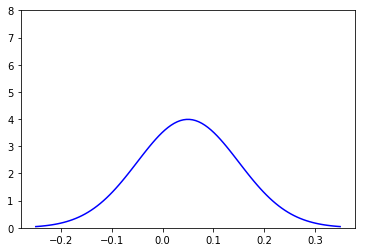

In [30]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
ax.plot(x_vals, MSFT, c='b')
ax.set_ylim(0, 8)
ax.ylabel='Normal curves'


# Add second normal curve

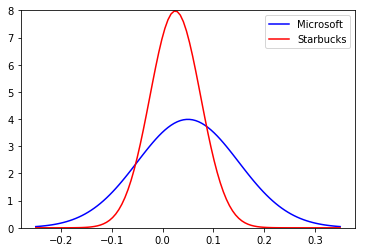

In [38]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
line1, = ax.plot(x_vals, MSFT, c='b', label='Microsoft')
line2, = ax.plot(x_vals, SBUX, c='r', label='Starbucks')
ax.set_ylim(0, 8)
ax.ylabel='Normal curves'
ax.legend(handles=[line1, line2])


# Determine the value-at-risk of simple monthly returns

In [41]:
# R ~ N(0.04, (0.09)^2) 
mu_R = 0.04
sigma_R = 0.09
# Initial wealth W0 = $100,000
W0 = 100000
# The 1% value-at-risk
ans = W0*norm.ppf(0.01, mu_R, sigma_R)
print("The 1% value-at-risk: ", ans)
# The 5% value-at-risk
ans = W0*norm.ppf(0.05, mu_R, sigma_R)
print("The 5% value-at-risk: ", ans)

The 1% value-at-risk:  -16937.1308664
The 5% value-at-risk:  -10803.6826426


# Determine the value-at-risk of continuously compounded monthly returns

In [43]:
# r ~ N(0.04, (0.09)^2) 
mu_r = 0.04
sigma_r = 0.09
# Initial wealth W0 = $100,000
W0 = 100000
# The 1% value-at-risk
ans=W0*np.exp(norm.ppf(0.01, mu_r, sigma_r))-W0
print("The 1% value-at-risk: ", ans)
# The 5% value-at-risk
ans=W0*np.exp(norm.ppf(0.05, mu_r, sigma_r))-W0
print("The 5% value-at-risk: ", ans)

The 1% value-at-risk:  -15580.4611877
The 5% value-at-risk:  -10240.5459377


# Compute simple monthly returns

In [47]:
# Vectors of prices
PA = (38.23, 41.29)
PC = (41.11, 41.74)

# Simple monthly returns
RA = (PA[1]-PA[0])/PA[0]
RC = (PC[1]-PC[0])/PC[0]

print(RA, RC)

0.08004185194873142 0.015324738506446183


# Compute continuously compounded monthly returns

In [52]:
# Continuously compounded returns
rA = np.log(1+RA)
rC = np.log(1+RC)

print(rA, rC)

0.0769997921897 0.0152085007393


# Compute simple total returns and dividend yields

In [55]:
# Cash dividend per share
DA = 0.1
# Simple total return
RA_total = (DA+PA[1]-PA[0])/PA[0]
# Dividend yield
DY = DA/PA[0]

print(RA_total, DY)

0.08265759874444165 0.0026157467957101757


# Compute annual returns

In [59]:
# Simple annual return
RA_annual = (1+RA)**12-1
# Continuously compounded annual return
rA_annual = np.log(1+RA_annual)

print(RA_annual, rA_annual)

1.5193413700621674 0.923997506276


# Compute portfolio shares and portfolio returns

In [61]:
# Portfolio shares
xA = 0.8
xC = 0.2

# Simple monthly return
ans=(xA*(1+RA)+xC*(1+RC)-1)
print(ans)

0.06709842926027454
